## 1. Chetan Shastry - D22013
## 2. Laxmi -D22024

# The House Price Prediction Problem

In this problem, we have been given a dataset that records the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. We are required to do the following tasks:

# 1) Question the data -

Understand the variables very carefully and formulate your questions/hypothesis. (Note that these are just your initial hypothesis which may or may not seem to be true after the EDA step)


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn import tree
import matplotlib.pyplot as plt

In [10]:
import os
os.getcwd()

'C:\\Users\\pallavi.chagi\\Downloads'

In [13]:
#Read the train data
data = pd.read_csv("kc_house_train_data.csv")
pd.set_option("display.max_columns", None)         #to display all the columns
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


**List of Predictors of the dataset**

* **date:** Categorical variable showing date of sell

* **bedrooms:** Categorical Variable showing number of bedrooms in house

* **batharooms:** Continuous Variable showing number of bathrooms in a house

* **sqft_living:** Continuous Variable showing living area in sqr.ft.

* **sqft_lot:** Continuous Variable showing lot area in sqr.ft.

* **floors:** Continuous variable showing number of floors

* **waterfront:** Categorical variable 0 indiacting No waterfron and 1 indicating waterfront near house 

* **condition:** Categorical variable showing condition of house on scale of 5

* **grade:** Categorical variable showing grade(Quality of the construction) on scale of 13

* **sqft_above:** Continuous variable showing Sqft_above for house

* **sqft_basement:** Continuous variable showing basement area in sqr.ft for house

* **yr_built:** Categorical variable Build year of house

* **yr_renovated:** Categorical variable showing house renovated year

* **zipcode:** * zipcode of location of house

* **lat / long:** Latitude and longitude of the House

* **sqft_living15:** Continuous Variable showing living area in sqr.ft as on 2015.

* **sqft_lot15:** Continuous Variable showing lot area in sqr.ft as on 2015.

**Target Vairable**

* **Price:** Continuous variable showing Price of the house.

## Creating Hypothesis and asking Questions
**After first glance over data and understanding variables we can formulate below Questions/hypothesis about data:**

* Usually House prices increase with the increase in size of the house. So, does incrase in **sqft_living area, sqft_lot area** shows increase in price?


* Bigger the house more is the price. **Number of floors, numebr of bedrooms, bathroom** has any effect on price?


* The Housing prices are seen to be dependent on the **age of the house**. Older Houses gets lower prices. Is our data supporting this? 


* Is **condition of the house** has any effect on the price? Are houses with high condition rating (good conditioned) are priced more compare to low condition rating (Bad conditioned) houses? 


* Do people prefer to live near **waterfront** paying higher prices? People usually like to live near to the nature.


* Better constructed houses last for many years. Does **grade** (construction Quality of House) has any effect on prices? Is House with Lower grade getting lower price?


* House which has undergone **renovation** gets more prices?


# 2) Exploratory Data Analysis(EDA)

explore the dataset very carefully. Do univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Report the surprising elements (i.e. the one which you believed would be true in step 1 did not turn out t be true, or a result that was beyond your expectation, etc.)

In [14]:
#data
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [15]:
#Shape of train data(#no. of rows , no of columns)
data.shape

(9761, 21)

In [16]:
#info of train data to check dtype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [18]:
#Checking for Null values
sum(data.isnull().sum())

#There are no null values in train data set

0

## Segmenting the dataset into continuous and categorical columns.

In [19]:
continuous_cols=data[['price', 'bathrooms', 
                       'sqft_living','sqft_lot', 'floors',
                       'sqft_above', 'sqft_basement', 'yr_built',
                       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
categorical_cols=data[['bedrooms', 'waterfront', 'view', 'condition', 'grade','yr_renovated', 'zipcode']]

In [20]:
#Describing the data
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000
mean,4605288287.66919,542734.95164,3.37588,2.11718,2086.73415,15215.26063,1.48607,0.00840,0.24803,3.41553,7.66151,1793.29116,293.44299,1970.79951,86.06659,98077.79019,47.56005,-122.21432,1992.35970,12824.78517
std,2876044376.02698,379527.63854,0.96070,0.77397,927.19430,41266.73460,0.53232,0.09127,0.78788,0.65055,1.18268,835.76382,442.61272,29.24001,405.41737,53.20359,0.14024,0.13989,687.32225,26518.33740
min,1200019.00000,80000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51400,620.00000,660.00000
25%,2126049290.00000,320000.00000,3.00000,1.75000,1420.00000,5100.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.46780,-122.32700,1490.00000,5160.00000
50%,3905040800.00000,450000.00000,3.00000,2.25000,1910.00000,7642.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1570.00000,0.00000,1975.00000,0.00000,98065.00000,47.57220,-122.22900,1840.00000,7660.00000
75%,7338402850.00000,649000.00000,4.00000,2.50000,2570.00000,10660.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2230.00000,570.00000,1996.00000,0.00000,98117.00000,47.68040,-122.12600,2370.00000,10113.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,12050.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,8860.00000,3480.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31900,5790.00000,560617.00000


### QUESTIONS

### Price

**How is the distribution of the price?**

* From the below plots it is clear that prices are **right skewed** and few houses are priced more which are outliers on right end of the distribution.
* From the desciption of data it is seen that average peice of the house is 542K with minimum price 80K and maximum price 7700 dollors. More than 50% of the houses fall below average 
* Since the price is heavily right skwed and do not have any zero or -ve values and we can take the log transformation to reduce the skweness. 

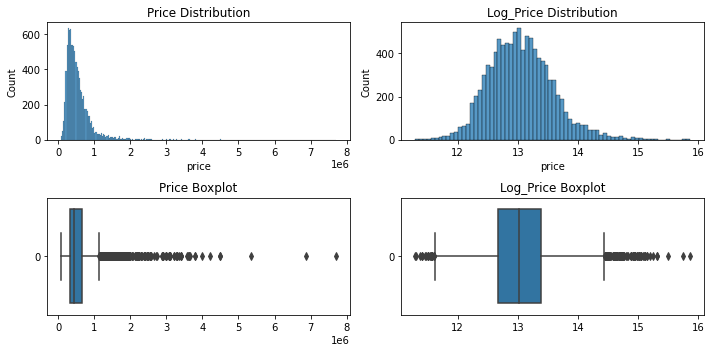

In [21]:
#plotting the graphs
fig = plt.figure(figsize=(10,5))  #Creating figure
plt.subplot(221)               #creating subplot
plt.title('Price Distribution')  # title
sns.histplot(data=data.price)   #histogram

plt.subplot(223)
plt.title('Price Boxplot')
sns.boxplot(data=data.price, orient='h')   #boxplot

plt.subplot(222)
plt.title('Log_Price Distribution')
sns.histplot(data=np.log(data.price))  #histograph

plt.subplot(224)
plt.title('Log_Price Boxplot')           #boxplot using log transformation
sns.boxplot(data=np.log(data.price), orient='h')
plt.tight_layout()

**What is range of prices?**

In [25]:
min(data.price),max(data.price)

(80000.0, 7700000.0)

**How many outliers are in house prices?**

In [46]:
iqr = data.price.quantile(0.75)- data.price.quantile(0.25)
ub = data.price.quantile(0.75) + 1.5*iqr   #Q1 + 1.5*IQR
lb = data.price.quantile(0.25) - 1.5*iqr   #Q1 - 1.5*IQR
print('interquartile range, upper boundry, lower boundry:',(iqr,ub,lb))

interquartile range, upper boundry, lower boundry: (329000.0, 1142500.0, -173500.0)


In [27]:
#There are 412 houses which are priced more than upper boundry(the outlier houses)
sum(data.price > ub)

522

In [28]:
#OUTLIERS below lb
sum(data.price < lb)

0

### sqft_living area
**Univariate analysis on living area**

**Q. What is ditribution of the living area?**

* The distribution is **right skwed**, similar to price distribution. The average living area is 2086 sq.ft.

* Since the price is heavily right skwed and do not have any zero or -ve values and we can take the log transformation to reduce the skweness.


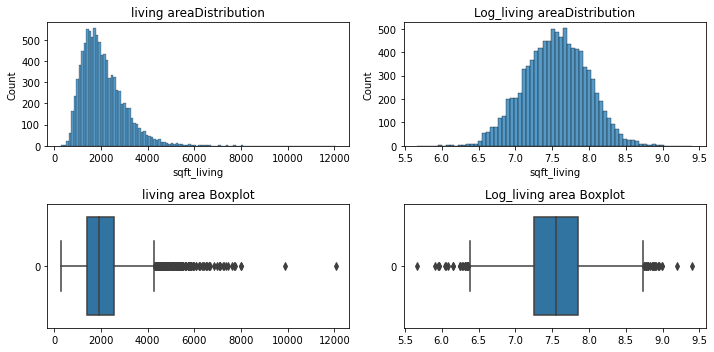

In [29]:
#Ploring a distribution graph
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.title('living areaDistribution')
sns.histplot(data=data.sqft_living)

plt.subplot(223) #plotting a Boxplot for living area
plt.title('living area Boxplot')
sns.boxplot(data=data.sqft_living, orient='h')

plt.subplot(222) #plotting a Log_living area
plt.title('Log_living areaDistribution')
sns.histplot(data=np.log(data.sqft_living))

plt.subplot(224) #plotting a Log_living area Boxplot
plt.title('Log_living area Boxplot')
sns.boxplot(data=np.log(data.sqft_living), orient='h')

plt.tight_layout()

**Bivariate analysis on living area**

**Q. Compare price and living area, is there linear relation?**

The scatter plot suggest linear relation between price and living area. As living area increase price increase

Text(0.5, 1.0, 'Log_price vs Log_sqr_living')

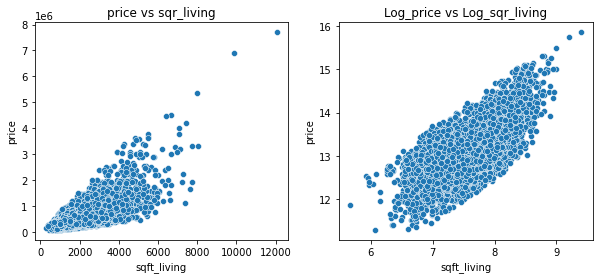

In [30]:
#Price vs sqft_living
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('price vs sqr_living')
sns.scatterplot(x=data.sqft_living, y=data.price)

plt.subplot(122) #log_Price vs sqft_living
sns.scatterplot(x=np.log(data.sqft_living), y=np.log(data.price))
plt.title('Log_price vs Log_sqr_living')

### sqft_lot
**Univariate analysis on sqft_lot using log tranformation as data is highly skwed**

**Q. What is range of lot area?**

The range is wider for the lot area and data is skwed.

In [31]:
#The extreme values are on far extreme of distribution
min(data.sqft_lot),max(data.sqft_lot)

(520, 1651359)

**Q. What is distribution of the sqft_lot?**

The outliers cased distribution to become skwed

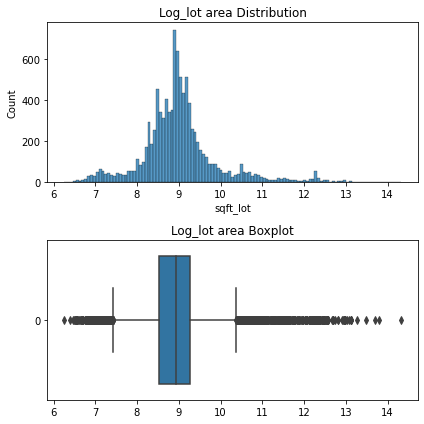

In [32]:
# Disribution plot
fig = plt.figure(figsize=(6,6))
plt.subplot(211)
plt.title('Log_lot area Distribution')
sns.histplot(data=np.log(data.sqft_lot))
plt.subplot(212)
plt.title('Log_lot area Boxplot')
sns.boxplot(data=np.log(data.sqft_lot), orient='h')
plt.tight_layout()

**Bivariate analysis on living area**

**Q. Compare price and lot area, is there linear relation?**

The scatter plot suggest no any linear relation between price and lot area as opposite to our hypothesis.

Text(0.5, 1.0, 'Log_price vs Log_lot area')

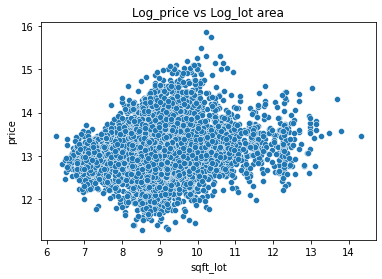

In [33]:
#Price vs sqft_lot
sns.scatterplot(x=np.log(data.sqft_lot), y=np.log(data.price))
plt.title('Log_price vs Log_lot area')

### bedrooms
**Q. House with how many bedroom sold more? is there any increase in price with bedroom number?**

We see that there are more house with 2,3 and 4 bedroom and average price of the houses increase slightly with increase in bedrooms till bedroom size is 6. 

Text(0.5, 1.0, 'Boxplot_bedrooms')

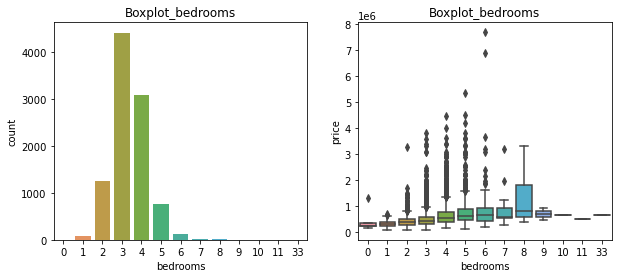

In [34]:
# graphs for bedrooms
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Boxplot_bedrooms')
sns.countplot(x='bedrooms',data=data)

plt.subplot(122) # Boxplot for bedrooms
sns.boxplot(x=data.bedrooms, y=data.price) #Taking log transorm since data is highly skwed
plt.title('Boxplot_bedrooms')


### bathroom

**Q. House with how many bathroom sold more? is there any increase in price with bathroom number?**

We can see that house with 2 bathrooms sold more follwed bt 3 and 1 bathrooms. The price of the house increases with bathrooms and people are ready to pay well above upper boundry for house with 2,3,4 bathroom.


Text(0.5, 1.0, 'log_price vs  bathrooms')

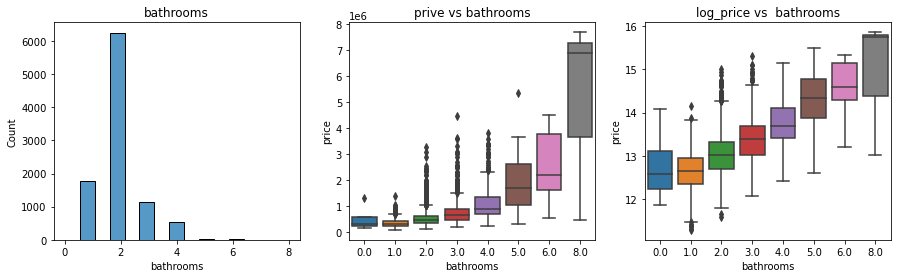

In [35]:
#Graphs for bathroom
fig = plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title('bathrooms')
sns.histplot(data=np.round(data.bathrooms))  #Since bathroom dats is floot rounding off to integer

plt.subplot(132)    #Boxplots for bathroom    
sns.boxplot(x=np.round(data.bathrooms), y=(data.price))
plt.title('prive vs bathrooms')

plt.subplot(133)   #Boxplots for bathroom vs log_price     
sns.boxplot(x=np.round(data.bathrooms), y=np.log((data.price)))
plt.title('log_price vs  bathrooms')


### floors

**Q. House with how many floors sold more? is there any increase in price with increase in number of floor?**

The house with 1 and 2 floors sold more , but, there isn't much of signifiant change in price due to number of floors

Text(0.5, 1.0, 'floors')

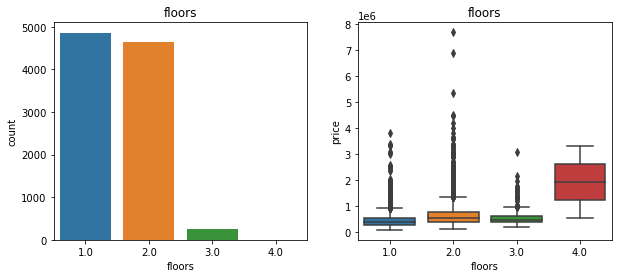

In [36]:
#graphs for floors
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('floors')
sns.countplot(x='floors',data=np.round(data))

plt.subplot(122) #boxplot for floors
sns.boxplot(x=np.round(data.floors), y=data.price) # rounding of floors to integer
plt.title('floors')


### waterfront

**Q How many houses are near waterfornt? Do you think the prices has any effect?**

Most of the houses are not near waterfront, only less than 1% of house are near waterfron. The data suggest the average cost of the house near waterfront is more compare to non waterfront house, but we have less number of house near waterfront.
People do not have any bias towards the house with waterfront.

Text(0.5, 1.0, 'Biivariate_waterfront')

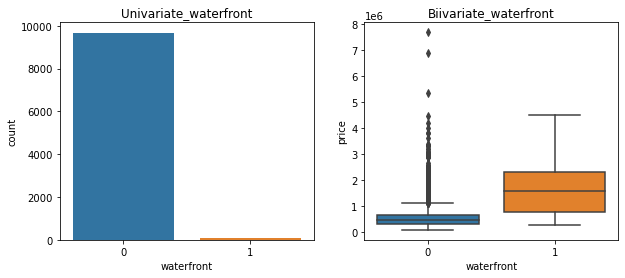

In [37]:
#garphs for warterfront
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Univariate_waterfront')
sns.countplot(x='waterfront',data=data)

plt.subplot(122) #Boxplot for warterfront
sns.boxplot(x=data.waterfront, y=data.price)
plt.title('Biivariate_waterfront')


In [610]:
# % of houses near waterfront is 0.80%
(data.waterfront[data.waterfront==1].sum()/len(data))*100

0.8400778608749104

### view

**Q Which house sold more? Any effect on price?**

The house with zero views sold more. The average price see slight change change with views but not much significant.

Text(0.5, 1.0, 'view')

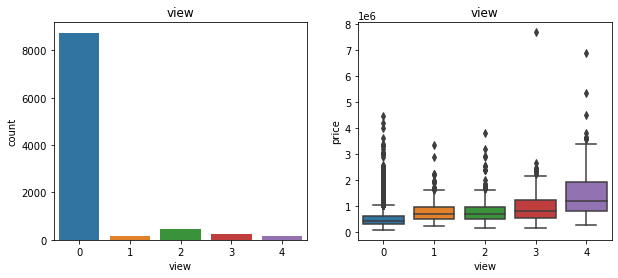

In [38]:
#graph for view
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('view')
sns.countplot(x='view',data=data)
plt.subplot(122) 
sns.boxplot(x=data.view, y=data.price)  #taking log transformation because data is highly skwed
plt.title('view')

In [39]:
# % number of houses with no views
(data.view[data.view==0].value_counts())/len(data)*100

0   89.62196
Name: view, dtype: float64

### condition

**Q What condition houses sold more? Any effect on price?**

The house with good condition rating 3,4,5 sold more. But Data do not suggest condition rating has much effect on the average price of the house. Average price remains more or less same.

Text(0.5, 1.0, 'condition')

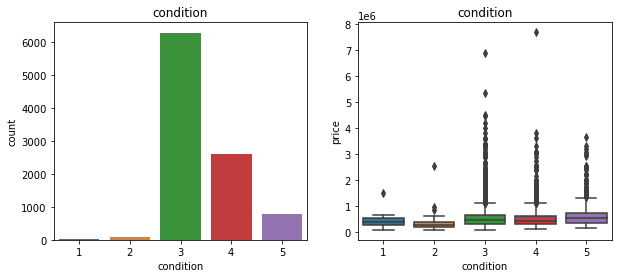

In [40]:
#graph fpr condition
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('condition')
sns.countplot(x='condition',data=data)

plt.subplot(122) #boxplot fpr condition
sns.boxplot(x=data.condition, y=data.price)
plt.title('condition')

### grade

**Q Which brade houses sold more? Any effect on price?**

The houses with grade 6,7,8,9 sold more. The grade of the house shows storg relation with price. As grade of the house increase the price of the house exponentialy increases.

Text(0.5, 1.0, 'log_price vs grade')

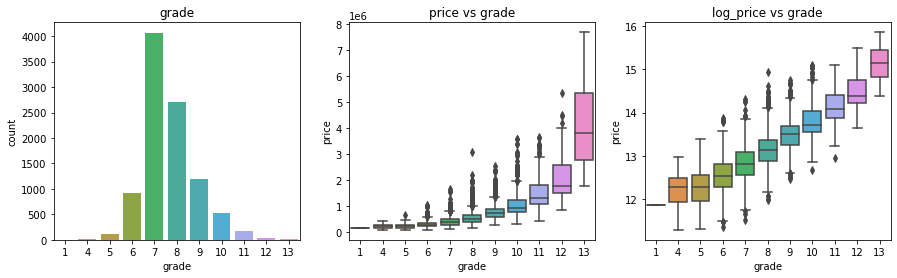

In [41]:
#graph fot grade
fig = plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title('grade')
sns.countplot(x='grade',data=data)

plt.subplot(132) #Boxplot fot grade
sns.boxplot(x=data.grade, y=data.price)
plt.title('price vs grade')

plt.subplot(133) 
sns.boxplot(x=data.grade, y=np.log(data.price))#Taking log price to understand better
plt.title('log_price vs grade')

### sqft_above
**Q. What is distribution of sqft_above?**

The distribution is right skwed similar to price distribution with mean 1796 sq.ft.

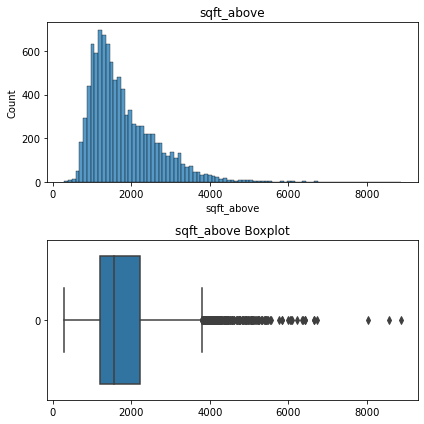

In [42]:
#Graph for sqt_above
fig = plt.figure(figsize=(6,6))
plt.subplot(211)
plt.title('sqft_above')
sns.histplot(data=data.sqft_above)

plt.subplot(212) #Boxplot for sqt_above
plt.title('sqft_above Boxplot')
sns.boxplot(data=data.sqft_above, orient='h')
plt.tight_layout()

**Q. Is there any effect of sqft_above on House prices?**

The House prices seem to follow moderate linearity with the sqft_above.

Text(0.5, 1.0, 'Log_price vs Log_sqft_above')

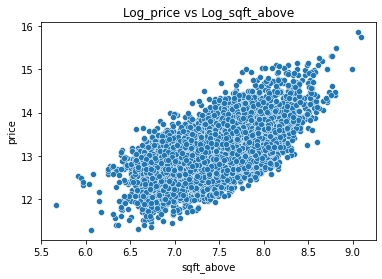

In [43]:
#Price vs sqft_above
sns.scatterplot(x=np.log(data.sqft_above), y=np.log(data.price))
plt.title('Log_price vs Log_sqft_above')

### yr_built vs yr_renovated

This shows the renovated houses are old buit, build before year 2000 and has not seen much of price increase due to revovation compare to other houses built same time.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

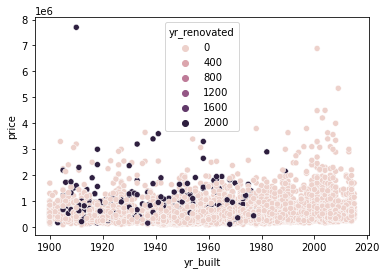

In [44]:
#Scatter plot for yr_built and yr_renovated
sns.scatterplot(x='yr_built', y='price', data=data, hue='yr_renovated')

### Correlation  heatmap

This shows the correlation matrix for the variable present in the data set.


<AxesSubplot:>

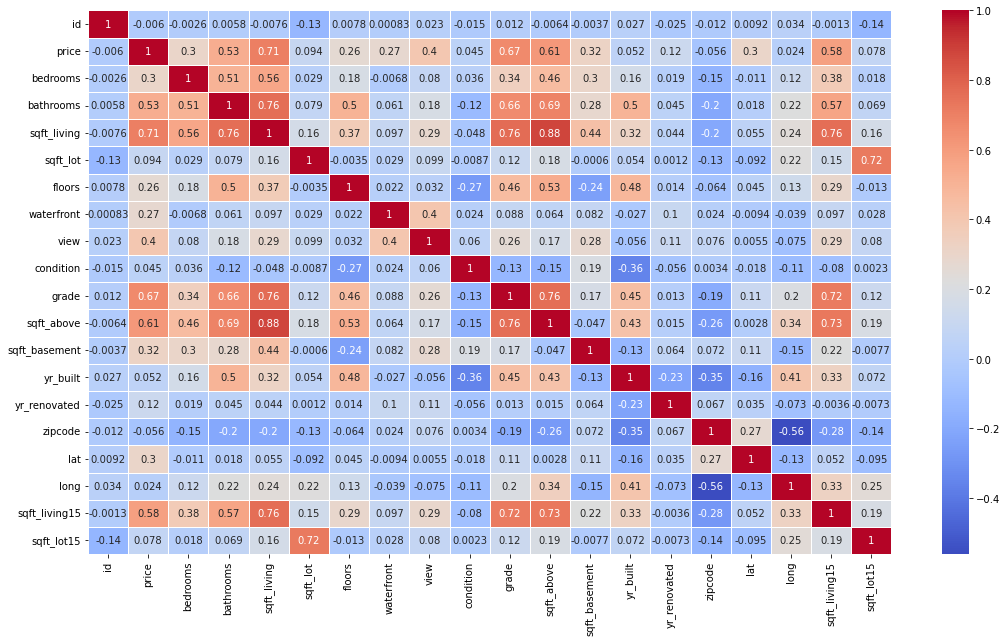

In [45]:
#heatmap
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linewidths=.5)

## Summary of EDA

**Predictors that may affect the Target**

* sqft_living
* grade
* bathrooms
* sqft_abve (higly correlated with sqft_living and can be dropped)
* sqft_living15 (higly correlated with sqft_living, can be dropped )
* view  (less significant)
* bedroom (less significant)
* waterfront (less significant)
* lat (less significant)

**Predictors that may NOT affect the Target**

* id
* date
* sqft_lot
* floor
* condition
* yr_built
* yr_renovated
* zipcode
* long

**Results that supports our Hypothesis**

* The house price increases with size of house i.e. living area of the house.
* House with more number of bathrooms and bedrroms see highr prices.
* People pay higher prices for better built houses i.e house with higher grade.
* House with views gets slighty more price.
* Most of the people do not live near waterfront, but prices of houses are higher for such houses.

**Results that do not support our hypothesis**

* Lot area of the house do not affect the prices of house. People prefer bigger living area over bigger lot area.
* Increased number of floors do not show increased in prices.
* Conditoin of house do not affect the house prices.
* houses price are not very dependent on Year built and year of renovation.

# 3) Initial model fitting step - 

FIt a couple of linear regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets. Report 10-fold cross-validation RMSE and R-squared values. Discuss the results.

### Fitting Linear Regression model

* Creating a function called **model_house(predictors, target, Model Number)** which will **return RMSE, r_square, adjusted r_square**
* The function will take predictors, target variable and model number. The function will run 10 fold cross_validation to calcultae RMSE and r_square. Also function will calculate adjusted r_square.

In [49]:
#Functon to calculate RMSE and r_square using linear regression and cross validation
def model_house(X,y,model_number=None):  
    model=LinearRegression()           #instance of model
    RMSE = -cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error').mean() #r_square
    r2 = cross_val_score(model, X, y, cv=10, scoring='r2').mean()   #meteric used are RMSE and r_square
    adj_r2=np.round(r2-((X.shape[1])-1)/(len(X)-(X.shape[1]))*(1-r2),2)
    results=print('Model',model_number,':\nRMSE:',np.round(RMSE,4),'\nr_square:',np.round(r2,2),'\nAdjusted r2:',adj_r2)
    return(results)

In [50]:
#X_train and y_train data
X_train=data[['id', 'date','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y_train = data[['price']]

**Model_1 : Target = [ Price ] ,  Predictors = [ sqft_living ]**

* Considering sqft_living as predictor for our first SLR model as it has highest correlation with target price.

In [51]:
model_house(X_train[['sqft_living']],np.array(y_train),1)

Model 1 :
RMSE: 268686.2432 
r_square: 0.49 
Adjusted r2: 0.49


In [52]:
model_house(X_train[['bathrooms']],np.array(y_train),1)

Model 1 :
RMSE: 321723.1503 
r_square: 0.27 
Adjusted r2: 0.27


**Model_2 : Target = [ Price ] ,  Predictors = [ sqft_living, 'grade' ]**

* To see if grade (quality of construction) and living area help improve the performance of the model

In [53]:
X=X_train[['sqft_living','grade']]    #Predictor
y=np.array(y_train) #Target
model_house(X,y,2)

Model 2 :
RMSE: 258217.7122 
r_square: 0.53 
Adjusted r2: 0.53


**Model_3 : Target = [ Price ] ,  Predictors = [ sqft_living,bathrooms ]**
* we have observed strong exposential relation between the price and bathrooms in EDA. we will add bathrooms, sqft_living to see if model improve performance.

In [54]:
X=X_train[['sqft_living','bathrooms']]    #Predictor
y=np.array(y_train) #Target
model_house(X,y,3)

Model 3 :
RMSE: 268676.5899 
r_square: 0.49 
Adjusted r2: 0.49


**Model_4 : Target = [Price] ,  Predictors = ['sqft_living','waterfront', 'view']**
* Consdering waterfront and view with sqft_living. As waterfront and view are not direclty related to attribute of house (like number of rooms, condition) and could be subjective person to person.

In [55]:
X=X_train[['sqft_living','view','waterfront']]     #Predictor
y=np.array(y_train) #Target
model_house(X,y,4)

Model 4 :
RMSE: 252037.9863 
r_square: 0.55 
Adjusted r2: 0.55


**Model_5 : Target = [Price] ,  Predictors = ['sqft_living','lat', 'long']**
* Conidering latitude to check if the loctaion of house contribute to model performace.

In [56]:
X=X_train[['sqft_living','lat','long']]   #Predictor
y=np.array(y_train) #Target
model_house(X,y,5)

Model 5 :
RMSE: 245937.9951 
r_square: 0.57 
Adjusted r2: 0.57


**Results**
* After fitting coulpe of initial models, we see that sqft_living being highly correlated feature contribute more to the performance of the model. Keeping sqft_living as baseline and adding few combination of fetures we tried to evaluate the features that could improve the performance of the model.

* The Quality of constructions helps the model to improve the performace.
* The number of bathrooms when used along with sqft_living seems to be not contributing enough to improve the r square.
* View and waterfront with sqft_living improve the r square ftom 0.49 to 0.55.
* The location of the house('lat','long') contribute to the model performance.


## 4) Feature engineering - 

(A) Suggest some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons, which you believe could have improved the performances of the previous models. Experiment to check if such transformations actually help to do so. (B) suggest some new feature generation techniques (e.g. creating dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature as you may convert the variable 'year built' to the 'age of the house'. Check if such transformations help in improving the performances of the models. Report the RMSE and R-squared values in each case.

### A) Log Transformation:

The dataset has lot of outliers which casesd data to be right skwed for few parameters. The outliers effect can be reduced using log transaformation. log transformation reduces or removes the skewness of our original data. Log Transaformation cannot be used on data with 0 and -ve value observations.

* **The distribution of target price is right skwed. we can use log transformation. but the predicted values will be log of price which need to back tranformed by exp(price)**

* **The sqft_living feature is right skwed due to outliers trying log transformation to check if it helps**

**1. Price to Log_price**

In [59]:
log_price = np.log(y_train.price)   #taking log of price

In [60]:
y_train.insert(0,'log_price',log_price)  ##INSERTING new column log_price at 0 index

In [61]:
y_train.head(1) #added log_price

,log_price,price
0,13.31133,604000.00000


In [62]:
model_house(X_train[['sqft_living','grade']],y_train[['price']],'without_log')
print('--------------------------------')
model_house(X_train[['sqft_living','grade']],y_train[['log_price']],'with_log_price')

Model without_log :
RMSE: 258217.7122 
r_square: 0.53 
Adjusted r2: 0.53
--------------------------------
Model with_log_price :
RMSE: 0.3509 
r_square: 0.56 
Adjusted r2: 0.56


The model with log improves the performance of the model with some combination of the features as r_square increase with log

**2. sqft_living to log_sqft_living**

In [65]:
log_sqft_living = np.log(X_train.sqft_living)  #Taking log of sq ft living

In [66]:
#INSERTING new column log_sqft_living at 0 index
X_train.insert(0,'log_sqft_living',log_sqft_living)

In [67]:
X_train.head(1)

,log_sqft_living,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.58070,2487200875,20141209T000000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000


In [68]:
model_house(X_train[['sqft_living','lat','view','grade']],y_train[['price']],'without_log')
print('--------------------------------')
model_house(X_train[['log_sqft_living','lat','view','grade']],y_train[['price']],'with_log_price')

Model without_log :
RMSE: 229000.1176 
r_square: 0.63 
Adjusted r2: 0.63
--------------------------------
Model with_log_price :
RMSE: 244648.0592 
r_square: 0.58 
Adjusted r2: 0.58


The model with log sqft_living does not contribute much to the model performance as r_square reduced for log

#### 3. sqrt Transformation (bedrooms):

The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. It is one of the alternative to log transformation when data has 0 or -ve values

In [69]:
bedrooms_sqrt= np.sqrt(X_train.bedrooms)  #takiong sqrt of bedrooms

In [70]:
X_train.insert(0,'bedrooms_sqrt',bedrooms_sqrt)

In [71]:
model_house(X_train[['sqft_living','bedrooms']],y_train[['price']],'with_bedrooms') #model with bedrooms

print('--------------------------------')

model_house(X_train[['bedrooms_sqrt']],y_train[['price']],'with_bedrooms_sqrt')#model without bedrooms

Model with_bedrooms :
RMSE: 265640.7144 
r_square: 0.5 
Adjusted r2: 0.5
--------------------------------
Model with_bedrooms_sqrt :
RMSE: 359968.6937 
r_square: 0.09 
Adjusted r2: 0.09


#### 4. sqrt Transformation (bathrooms):

In [72]:
bathrooms_sqrt= np.sqrt(X_train.bathrooms) #Taking sqrt transformation

In [73]:
X_train.insert(0,'bathrooms_sqrt',bathrooms_sqrt)

In [74]:
model_house(X_train[['bathrooms']],y_train[['price']],'with_bedrooms')
print('--------------------------------')
model_house(X_train[['bathrooms_sqrt']],y_train[['price']],'with_bedrooms_sqrt')

Model with_bedrooms :
RMSE: 321723.1503 
r_square: 0.27 
Adjusted r2: 0.27
--------------------------------
Model with_bedrooms_sqrt :
RMSE: 329842.3662 
r_square: 0.23 
Adjusted r2: 0.23


bedroom and bathrooms do not improve r_square after sqrt transformation. 

### B) New feature generation

In [75]:
house_age = 2015 - (X_train.yr_built) #creating new feature

In [76]:
X_train.insert(0,'house_age',house_age)

In [77]:
model_house(X_train[['sqft_living']],y_train[['price']],'without_new feature house_age')
print('--------------------------------')
model_house(X_train[['sqft_living','house_age']],y_train[['price']],'with_house_age')

Model without_new feature house_age :
RMSE: 268686.2432 
r_square: 0.49 
Adjusted r2: 0.49
--------------------------------
Model with_house_age :
RMSE: 259925.0546 
r_square: 0.52 
Adjusted r2: 0.52


The r2 increase from previous best 0.65 to new 0.68 after adding new feature age of the house.

## 5) Model fitting step 2 (Linear regresssion)-

You may use model selection methods like (forward selection or backward elimination methods) to select an appropriate model.

### Forward Selection Method:
* Feature variables examined one at a time.
* Use stopping rule (such as r square, adj r sqaure, p value) that acts as a hurdle the variable must overcome to be allowed in a model.
* Added feature must reduce error significantly.
* once variable added to model it stays and never removed
* Then the process repeats until all variables are in model or no variable passes the stopping rule.
* The ability of variables to reduce error can change as other variable enters the model

**Model_1 : Target = [ Price ] , Predictors = [ sqft_living ]**

In [78]:
X=X_train[['sqft_living']]#Predictor
y=y_train[['log_price']] #Target
model_house(X,y,1)

Model 1 :
RMSE: 0.3786 
r_square: 0.49 
Adjusted r2: 0.49


**Model_2 : Target = [ Price ] , Predictors = [ sqft_living, lat ]**

In [79]:
X=X_train[['sqft_living','lat']]#Predictor
y=y_train[['log_price']] #Target
model_house(X,y,2)

Model 2 :
RMSE: 0.3112 
r_square: 0.65 
Adjusted r2: 0.65


**Model_3 : Target = [ Price ] , Predictors = [ sqft_living, lat, grade ]**

In [80]:
X=X_train[['sqft_living','lat','grade']]#Predictor
y=y_train[['log_price']] #Target
model_house(X,y,3)

Model 3 :
RMSE: 0.2869 
r_square: 0.71 
Adjusted r2: 0.71


**Model_4 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age' ]**

In [81]:
X=X_train[['sqft_living','lat','grade','house_age']]#Predictor
y=y_train[['log_price']] #Target
model_house(X,y,4)

Model 4 :
RMSE: 0.273 
r_square: 0.73 
Adjusted r2: 0.73


**Model_5 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','waterfront' ]**

In [82]:
X=X_train[['sqft_living','lat','grade','house_age','waterfront']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,5.1)

Model 5.1 :
RMSE: 0.2671 
r_square: 0.75 
Adjusted r2: 0.75


**Model_6 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','waterfront',bathrooms ]**

In [83]:
X=X_train[['sqft_living','lat','grade','house_age','waterfront','bathrooms']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,5.2)

Model 5.2 :
RMSE: 0.2646 
r_square: 0.75 
Adjusted r2: 0.75


**Model_7 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','view' ]**

In [84]:
X=X_train[['sqft_living','lat','grade','house_age','view']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,7)

Model 7 :
RMSE: 0.2661 
r_square: 0.75 
Adjusted r2: 0.75


**Model_8 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','view','waterfront']**

In [85]:
X=X_train[['sqft_living','lat','grade','house_age','view','waterfront']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,8)

Model 8 :
RMSE: 0.2637 
r_square: 0.75 
Adjusted r2: 0.75


**Model_9 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','view','waterfront','bathrooms']**

In [86]:
X=X_train[['sqft_living','lat','grade','house_age','view','waterfront','bathrooms']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,9)

Model 9 :
RMSE: 0.2612 
r_square: 0.76 
Adjusted r2: 0.76


**Model_10 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','view','waterfront','bathrooms','condition']**

In [87]:
X=X_train[['sqft_living','lat','grade','house_age','view','waterfront','bathrooms','condition']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,10)

Model 10 :
RMSE: 0.2593 
r_square: 0.76 
Adjusted r2: 0.76


**Model_11 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','view','waterfront','bathrooms','condition','floors']**

In [88]:
X=X_train[['sqft_living','lat','grade','house_age','view','waterfront','bathrooms','condition','floors']] #Predictor
y=y_train[['log_price']] #Target
model_house(X,y,11)

Model 11 :
RMSE: 0.2577 
r_square: 0.76 
Adjusted r2: 0.76



### **Competing Models:**
* Model 9,10,11 has same r_square value, we will choose one which has less number of variables as adding variables not improving performnce and to avoid any possibility of overfitting.(Model_9)
* Model 5,6,7,8 has same r_square value, we will choose one with less variables(Model_5)
* Model5 and Model 9 will be taken for test data

## 6) Model fitting step 3 (decision tree) - 

Experiment and check if a decision tree model can be used to fit the data mode accurately. You are free to use any kind of hyperparameter tuning to fit the model. Experiment using all the feature sets you have created before (including all the transformed sets and new feature-generated sets).


Defing function to calculate r_square and RMSE for the Decision tree  [model_house_DT(X,y,model,model_number=None)]

In [89]:
#Creating function to calculate RMSE and r_square for decision tree using cross validation
def model_house_DT(X,y,model,model_number=None):
    model = model
    RMSE = -cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error').mean() 
    r2 = cross_val_score(model, X, y, cv=10, scoring='r2').mean()   #meteric used are RMSE and r_square
    adj_r2=np.round(r2-((X.shape[1])-1)/(len(X)-(X.shape[1]))*(1-r2),2)
    results=print('Model',model_number,':\nRMSE:',np.round(RMSE,2),'\nr_square:',np.round(r2,3),'\nAdjusted r2:',adj_r2)
    return(results)

In [90]:
X_train=X_train.drop(['date'],axis=1)

#### Decision Tree (Target =[ price ], Predictors=All the features)

In [91]:
#fitting decision tree model 1
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.05, random_state=100)
model_house_DT(X_train,y_train[['price']],model)

Model None :
RMSE: 256317.78 
r_square: 0.538 
Adjusted r2: 0.54


#### Decision Tree (Target =[ log_price ], Predictors=All the features)

In [92]:
#fitting decision tree model 2
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.05, random_state=100)
model_house_DT(X_train,y_train[['log_price']],model)

Model None :
RMSE: 0.29 
r_square: 0.699 
Adjusted r2: 0.7


* The decison tree gives better results when we transormed taregt variable log_price compare to the original variable price.
* The r_square for the Decision tree is 0.70 which is little less for the models we have selected fot Multiple linear regression.

## 7) Model testing -

Consider the best competing models and test their performances on the test data. Report the results.


In [93]:
#Read the train data
test = pd.read_csv("kc_house_test_data.csv")

In [94]:
#X_train and y_train data
X_test=test[['id','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y_test= test[['price']]

Adding log_price transformed feature

In [95]:
#taking log of price
log_price = np.log(y_test.price)

In [96]:
y_test.insert(0,'log_price',log_price) #inserting new feature

In [97]:
y_test.head(1)

,log_price,price
0,12.68541,323000.00000


Adding house_age new feature

In [98]:
house_age = 2015 - (X_test.yr_built) #creating new feature house age

In [99]:
X_test.insert(0,'house_age',house_age)  #adding house age to data

### Testing Models:

**Model 9 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','view','waterfront','bathrooms']**

In [100]:
#trining the model from the train data(as peviously we have used only cross val function)
X=X_train[['sqft_living','lat','grade','house_age','view','waterfront','bathrooms']]
y=y_train[['log_price']]
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [101]:
#testing model
test=X_test[['sqft_living','lat','grade','house_age','view','waterfront','bathrooms']]
pred_log=model.predict(test)
pred=np.exp(pred_log)

<AxesSubplot:ylabel='Count'>

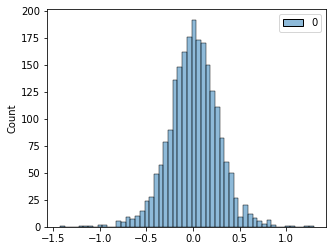

In [102]:
#Residual distribution showing normal distribution
fig = plt.figure(figsize=(5,4))
sns.histplot(np.array(y_test[['log_price']])-pred_log)

In [103]:
#coefficients
coeff_df = pd.DataFrame(model.coef_.reshape(7,),test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,0.00018
lat,1.31417
grade,0.19035
house_age,0.00369
view,0.06263
waterfront,0.42935
bathrooms,0.07760


In [104]:
#r_square and RMSE
print('RMSE:', np.round(np.sqrt(MSE(np.array(y_test[['price']]), pred)),2))
print('r_square:', np.round(r2_score(np.array(y_test[['price']]), pred),2))

RMSE: 193872.65
r_square: 0.71


**Model 5 : Target = [ Price ] , Predictors = ['sqft_living','lat','grade','house_age','waterfront'']**

In [105]:
#trining the model from the train data(as peviously we have used only cross val function)
X2=X_train[['sqft_living','lat','grade','house_age','waterfront']]
y2=y_train[['log_price']]
model=LinearRegression()
model.fit(X2,y2)

LinearRegression()

In [106]:
#fitting model
test2=X_test[['sqft_living','lat','grade','house_age','waterfront']]
pred_log2=model.predict(test2)
pred2=np.exp(pred_log2)

<AxesSubplot:ylabel='Count'>

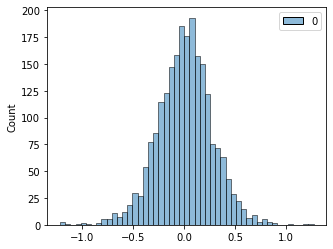

In [107]:
#Residual distribution showing normal distribution
fig = plt.figure(figsize=(5,4))
sns.histplot(np.array(y_test[['log_price']])-pred_log2)

In [108]:
#coefficients
coeff_df = pd.DataFrame(model.coef_.reshape(5,),test2.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,0.00022
lat,1.30541
grade,0.20096
house_age,0.00345
waterfront,0.62825


In [109]:
#r_square and RMSE
print('RMSE:', np.sqrt(MSE(np.array(y_test[['price']]), pred2)))
print('R_square:', np.round(r2_score(np.array(y_test[['price']]), pred2),3))

RMSE: 197251.5567837643
R_square: 0.697


## REULTS:

* **The model 9 has less  RMSE and high r^2 compare to Model 5.The Model 9 is best performing model**
* **In model 9 features ['sqft_living','lat','grade','house_age','view','waterfront','bathrooms'] are able to explain 71% of the variation in house prices**